In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

In [3]:
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from deepctr.models import *
from deepctr.feature_column import SparseFeat, DenseFeat, get_feature_names

In [5]:
data = pd.read_csv('sample.txt')

sparse_features = ['C' + str(i) for i in range(1, 27)]
dense_features = ['I' + str(i) for i in range(1, 14)]

data[sparse_features] = data[sparse_features].fillna('-1', )
data[dense_features] = data[dense_features].fillna(0, )
target = ['label']

for feat in sparse_features:
    lbe = LabelEncoder()
    data[feat] = lbe.fit_transform(data[feat])
mms = MinMaxScaler(feature_range=(0, 1))
data[dense_features] = mms.fit_transform(data[dense_features])

# 2.count #unique features for each sparse field,and record dense feature field name

fixlen_feature_columns = [SparseFeat(feat, vocabulary_size=data[feat].max() + 1, embedding_dim=4)
                            for i, feat in enumerate(sparse_features)] + [DenseFeat(feat, 1, )
                                                                        for feat in dense_features]

dnn_feature_columns = fixlen_feature_columns
linear_feature_columns = fixlen_feature_columns

feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)

In [9]:
# 3.generate input data for model
epochs = 30


train, test = train_test_split(data, test_size=0.2, random_state=2020)
train_model_input = {name: train[name] for name in feature_names}
test_model_input = {name: test[name] for name in feature_names}

# 4.Define Model,train,predict and evaluate
model = DeepFM(linear_feature_columns, dnn_feature_columns, task='binary')
model.compile("adam", "binary_crossentropy",
                metrics=['binary_crossentropy'], )

history = model.fit(train_model_input, train[target].values,
                    batch_size=256, epochs=epochs, verbose=2, validation_split=0.2, )

Epoch 1/30
1/1 - 3s - loss: 0.7207 - binary_crossentropy: 0.7207 - val_loss: 0.7286 - val_binary_crossentropy: 0.7286
Epoch 2/30
1/1 - 0s - loss: 0.6936 - binary_crossentropy: 0.6936 - val_loss: 0.7108 - val_binary_crossentropy: 0.7108
Epoch 3/30
1/1 - 0s - loss: 0.6686 - binary_crossentropy: 0.6686 - val_loss: 0.6941 - val_binary_crossentropy: 0.6941
Epoch 4/30
1/1 - 0s - loss: 0.6449 - binary_crossentropy: 0.6448 - val_loss: 0.6783 - val_binary_crossentropy: 0.6783
Epoch 5/30
1/1 - 0s - loss: 0.6217 - binary_crossentropy: 0.6217 - val_loss: 0.6631 - val_binary_crossentropy: 0.6631
Epoch 6/30
1/1 - 0s - loss: 0.5985 - binary_crossentropy: 0.5985 - val_loss: 0.6486 - val_binary_crossentropy: 0.6486
Epoch 7/30
1/1 - 0s - loss: 0.5753 - binary_crossentropy: 0.5753 - val_loss: 0.6350 - val_binary_crossentropy: 0.6350
Epoch 8/30
1/1 - 0s - loss: 0.5525 - binary_crossentropy: 0.5525 - val_loss: 0.6231 - val_binary_crossentropy: 0.6230
Epoch 9/30
1/1 - 0s - loss: 0.5303 - binary_crossentropy

In [12]:
val_loss.index(min(val_loss))

11

c:\Users\OMEN\anaconda3\envs\deepctr\lib\site-packages\ipykernel_launcher.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  from ipykernel import kernelapp as app
c:\Users\OMEN\anaconda3\envs\deepctr\lib\site-packages\ipykernel_launcher.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  app.launch_new_instance()


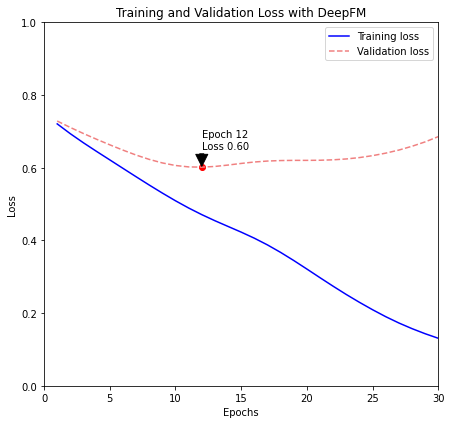

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_list = range(1, len(loss) + 1)

#getting lowest val_loss
min_loss_epoch = epochs_list[val_loss.index(min(val_loss))]
min_loss_value = min(val_loss)


# Plotting the Loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_list, loss, 'b-', label='Training loss', color='blue')
plt.plot(epochs_list, val_loss, 'r--', label='Validation loss', color='lightcoral')
plt.scatter(min_loss_epoch, min_loss_value, color='red')  # Red dot at minimum validation loss
plt.annotate(f'Epoch {min_loss_epoch}\nLoss {min_loss_value:.2f}',
             xy=(min_loss_epoch, min_loss_value),
             xytext=(min_loss_epoch, min_loss_value + 0.05),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('Training and Validation Loss with DeepFM')
ax = plt.gca()
ax.set_xlim([0,30])
ax.set_ylim([0,1])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
pred_ans = model.predict(test_model_input, batch_size=256)
print("test LogLoss", round(log_loss(test[target].values, pred_ans), 4))
print("test AUC", round(roc_auc_score(test[target].values, pred_ans), 4))

test LogLoss 0.4743
test AUC 0.7527


In [19]:
test_model_input.keys()

dict_keys(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10', 'I11', 'I12', 'I13'])

In [20]:
type(model)

tensorflow.python.keras.engine.functional.Functional